In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
from scipy.stats import ttest_ind
from numba import njit, jit
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
meta = pd.read_csv('../data/META_SL.csv')

In [3]:
meta['plat'].unique()

array(['Agilent', 'Illumina_NGS', 'Affymetrix_U133', 'Illumina_Chip',
       'Affymetrix_HUG', 'Affymetrix_PRV'], dtype=object)

In [4]:
meta

,CN,type,plat,TP
0,C_1,Solid tumor,Agilent,Solid tumor_Agilent
1,C_2,Solid tumor,Agilent,Solid tumor_Agilent
2,C_3,Solid tumor,Agilent,Solid tumor_Agilent
3,C_4,Solid tumor,Agilent,Solid tumor_Agilent
4,C_5,Solid tumor,Agilent,Solid tumor_Agilent
...,...,...,...,...
7162,C_7163,C,Affymetrix_PRV,C_Affymetrix_PRV
7163,C_7164,D,Affymetrix_PRV,D_Affymetrix_PRV
7164,C_7165,D,Affymetrix_PRV,D_Affymetrix_PRV
7165,C_7166,D,Affymetrix_PRV,D_Affymetrix_PRV


#### Данные, на которых нужно проверить гипотезу

In [5]:
data = pd.read_csv('D:/data/30.csv')

In [6]:
data.head()

,S9bcbf828_bd0c_4a71_8021_7a262de8978c,S23ea1a02_938c_47cc_8a7d_abd33db1f305,Sddfe7bdf_0d22_4f98_b712_09df67794990,Sb80aec3c_742c_4e9d_b45b_53809b6b80f1,S988b3794_2640_4ff6_a739_d473adbca3e8,S5d095a36_74db_44ec_bca2_35af7a47f1c5,S97e6b861_062c_4235_8f12_db621f22e353,S9120d8d8_8605_493d_a963_7642852778c4,S10aa11ee_6df1_42f6_bc32_6ffed2e7d25c,S3e1fc047_a69e_469b_a005_33b208fdbfd3,...,AFX_GPL16043_B_3,AFX_GPL16043_B_4,AFX_GPL16043_C_1,AFX_GPL16043_C_2,AFX_GPL16043_C_3,AFX_GPL16043_C_4,AFX_GPL16043_D_1,AFX_GPL16043_D_2,AFX_GPL16043_D_3,AFX_GPL16043_D_4
A2M,196071.323500,140696.252928,140962.753896,286549.496608,12705.444403,170210.646699,189862.675713,180126.899163,200911.753450,107081.979757,...,17310.001907,16689.133282,290635.641999,349769.815011,311171.800861,349195.972716,23467.374606,24048.181794,24095.159797,20943.105125
AACS,2149.033760,2143.402774,2302.756784,2083.976743,2036.616261,1777.118669,1681.389073,1983.825738,2162.773139,2635.004302,...,678.598632,650.383717,499.853477,469.914567,464.998071,577.038841,572.285501,575.312880,554.805917,547.144759
AAK1,181.832207,186.849346,151.955500,152.029299,118.019608,138.307280,142.220579,158.180360,148.376678,203.820867,...,18259.470872,16781.606415,1315.227806,1017.870888,990.325767,1097.358591,10661.667927,11158.252672,12044.186542,13053.251483
AAMP,5072.747691,4482.177995,4591.630806,5130.826703,6379.278254,4407.869785,4490.056555,4449.580037,5543.321158,7417.771636,...,3973.602565,3904.769344,3814.201597,3846.383205,3673.330512,4000.380147,3545.795397,3648.293756,3682.215542,3760.226350
AASDHPPT,1810.304298,3546.880728,2664.554573,1680.288342,817.473400,3203.972552,3137.099491,4165.678452,2857.643729,1439.456005,...,4205.389369,4178.999161,5783.318493,2202.147467,6011.124576,2026.710105,3349.162672,3344.851770,3332.247978,3398.780036


In [7]:
data.columns = meta['CN']

In [8]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,196071.323500,140696.252928,140962.753896,286549.496608,12705.444403,170210.646699,189862.675713,180126.899163,200911.753450,107081.979757,...,17310.001907,16689.133282,290635.641999,349769.815011,311171.800861,349195.972716,23467.374606,24048.181794,24095.159797,20943.105125
AACS,2149.033760,2143.402774,2302.756784,2083.976743,2036.616261,1777.118669,1681.389073,1983.825738,2162.773139,2635.004302,...,678.598632,650.383717,499.853477,469.914567,464.998071,577.038841,572.285501,575.312880,554.805917,547.144759
AAK1,181.832207,186.849346,151.955500,152.029299,118.019608,138.307280,142.220579,158.180360,148.376678,203.820867,...,18259.470872,16781.606415,1315.227806,1017.870888,990.325767,1097.358591,10661.667927,11158.252672,12044.186542,13053.251483
AAMP,5072.747691,4482.177995,4591.630806,5130.826703,6379.278254,4407.869785,4490.056555,4449.580037,5543.321158,7417.771636,...,3973.602565,3904.769344,3814.201597,3846.383205,3673.330512,4000.380147,3545.795397,3648.293756,3682.215542,3760.226350
AASDHPPT,1810.304298,3546.880728,2664.554573,1680.288342,817.473400,3203.972552,3137.099491,4165.678452,2857.643729,1439.456005,...,4205.389369,4178.999161,5783.318493,2202.147467,6011.124576,2026.710105,3349.162672,3344.851770,3332.247978,3398.780036


In [9]:
data = data.astype(float)

In [10]:
data.head()

CN,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,...,C_7158,C_7159,C_7160,C_7161,C_7162,C_7163,C_7164,C_7165,C_7166,C_7167
A2M,196071.323500,140696.252928,140962.753896,286549.496608,12705.444403,170210.646699,189862.675713,180126.899163,200911.753450,107081.979757,...,17310.001907,16689.133282,290635.641999,349769.815011,311171.800861,349195.972716,23467.374606,24048.181794,24095.159797,20943.105125
AACS,2149.033760,2143.402774,2302.756784,2083.976743,2036.616261,1777.118669,1681.389073,1983.825738,2162.773139,2635.004302,...,678.598632,650.383717,499.853477,469.914567,464.998071,577.038841,572.285501,575.312880,554.805917,547.144759
AAK1,181.832207,186.849346,151.955500,152.029299,118.019608,138.307280,142.220579,158.180360,148.376678,203.820867,...,18259.470872,16781.606415,1315.227806,1017.870888,990.325767,1097.358591,10661.667927,11158.252672,12044.186542,13053.251483
AAMP,5072.747691,4482.177995,4591.630806,5130.826703,6379.278254,4407.869785,4490.056555,4449.580037,5543.321158,7417.771636,...,3973.602565,3904.769344,3814.201597,3846.383205,3673.330512,4000.380147,3545.795397,3648.293756,3682.215542,3760.226350
AASDHPPT,1810.304298,3546.880728,2664.554573,1680.288342,817.473400,3203.972552,3137.099491,4165.678452,2857.643729,1439.456005,...,4205.389369,4178.999161,5783.318493,2202.147467,6011.124576,2026.710105,3349.162672,3344.851770,3332.247978,3398.780036


#### Код Стьюдента

In [11]:
rng = np.random.default_rng()

In [12]:
def get_splitted_columns(columns):
    shuffled = rng.permutation(columns)
    columns_1 = shuffled[:len(columns) // 2]
    columns_2 = shuffled[len(columns) // 2:]
    return columns_1, columns_2

In [13]:
def split_for_f(gene, columns_1, columns_2):
    sample_1 = gene[columns_1].values
    sample_2 = gene[columns_2].values
    return f(sample_1, sample_2)

$$
f_g = sign(\overline{D}_g - \overline{H}_g) \cdot (-lg(P_g))
$$

In [14]:
# @njit
def f(sample_1, sample_2):
    sign = np.sign(sample_1.mean() - sample_2.mean())
    p_value = ttest_ind(sample_1, sample_2)[1]
    return sign * (-np.log1p(p_value))

In [15]:
def calc_corr(data, fixed_cols, splitting_cols):
    cols_1, cols_2 = get_splitted_columns(splitting_cols)
    
    f_1 = data.apply(split_for_f, args=(fixed_cols, cols_1), axis=1)
    f_2 = data.apply(split_for_f, args=(fixed_cols, cols_2), axis=1)
    
    return f_1.corr(f_2)

In [16]:
# %time calc_corr(data, plat_1, plat_2)

#### Перебор всех пар платформ

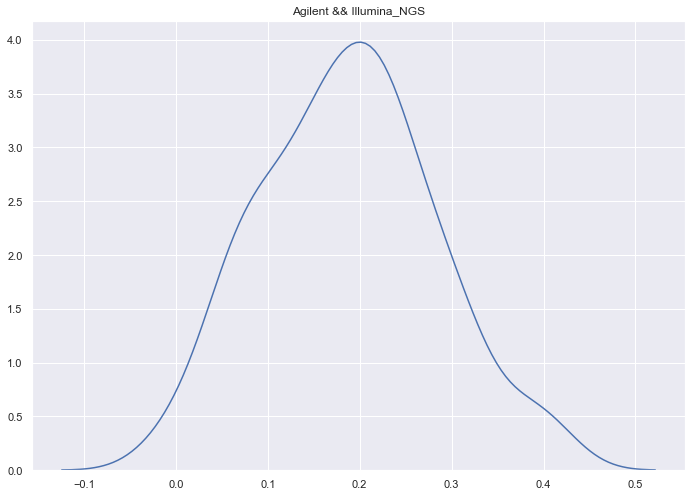

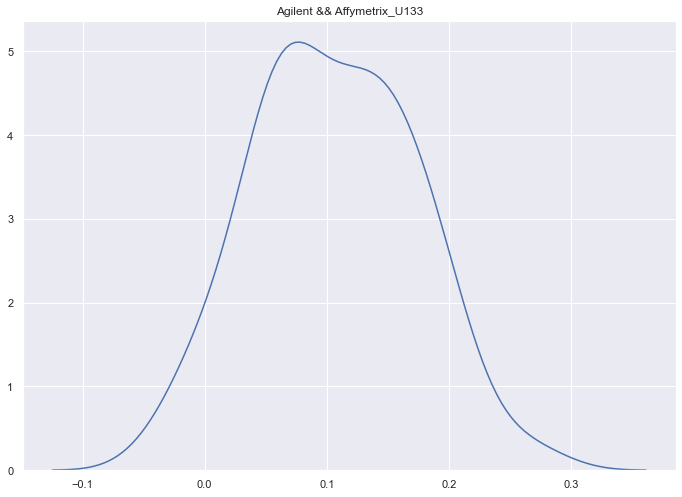

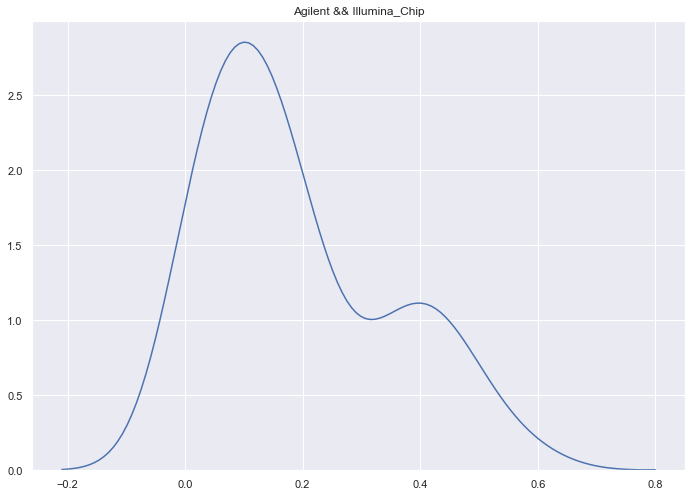

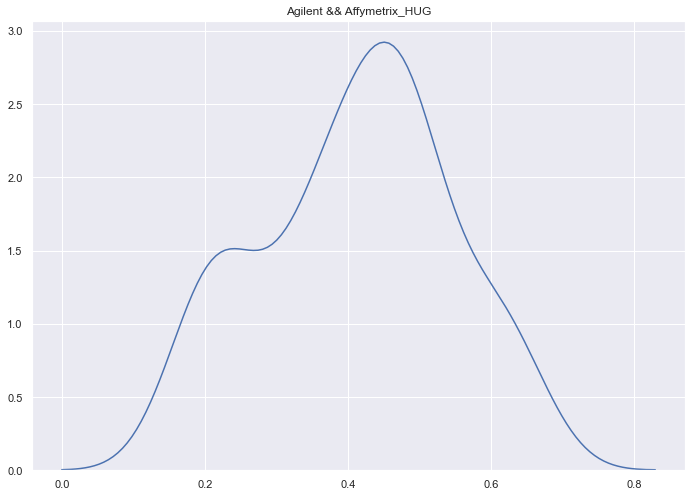

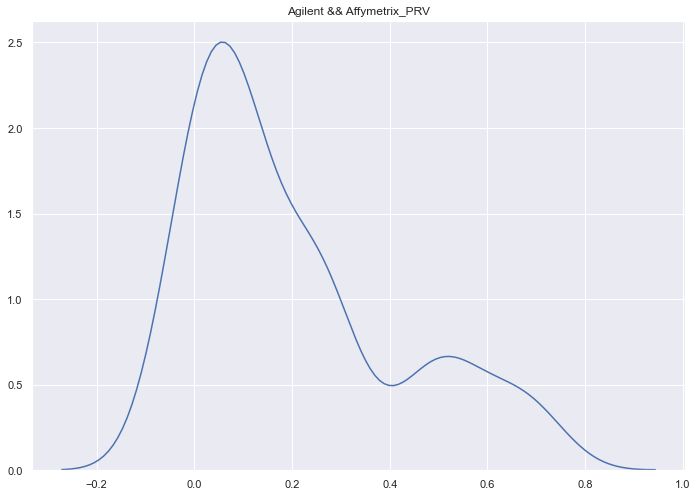

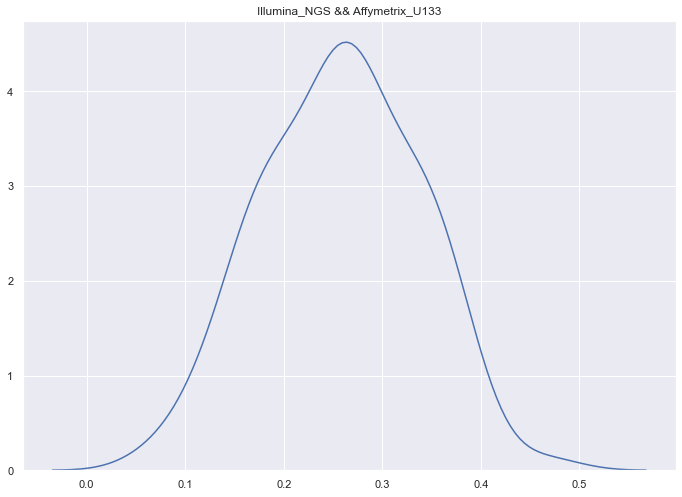

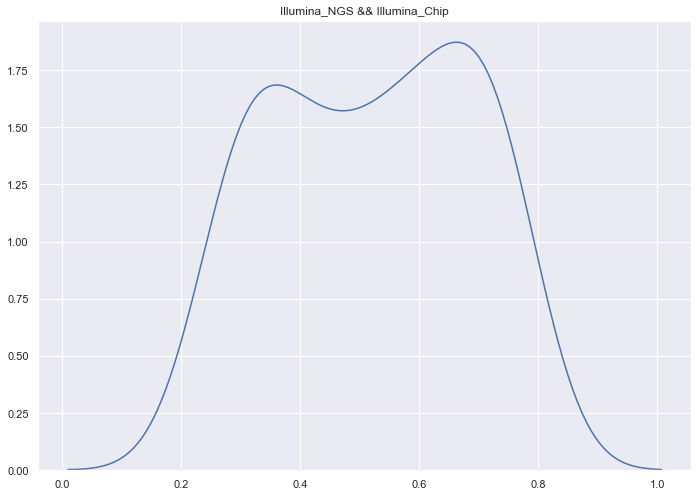

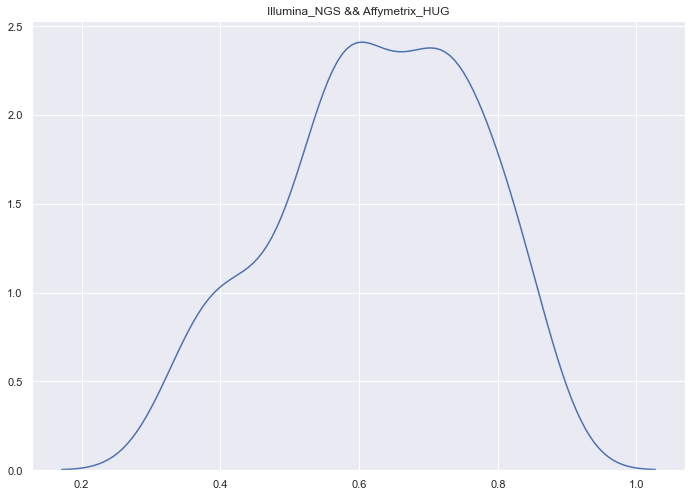

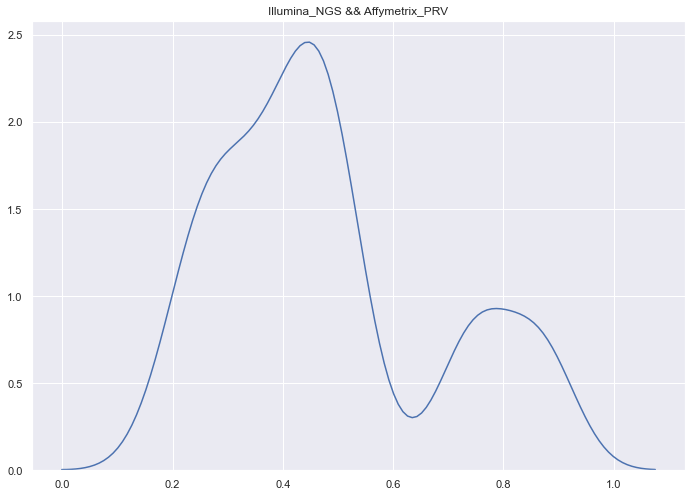

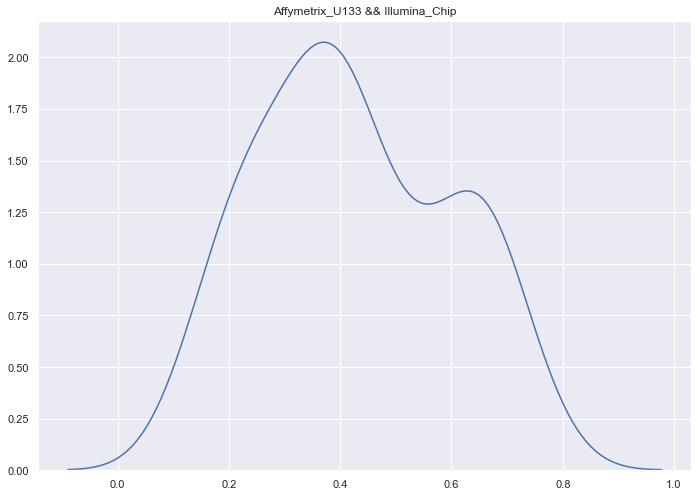

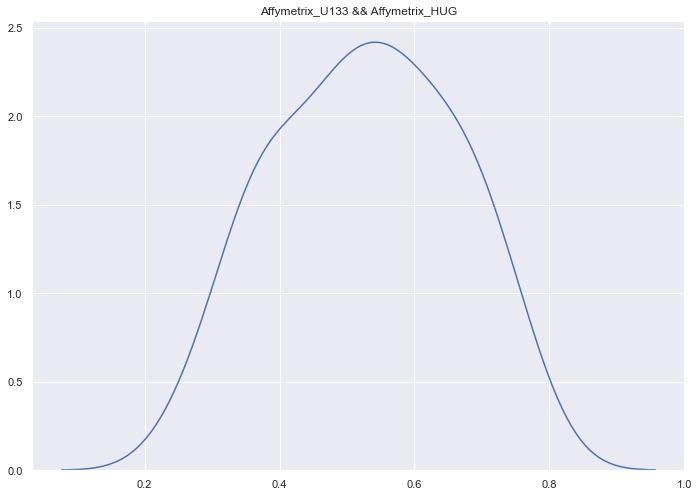

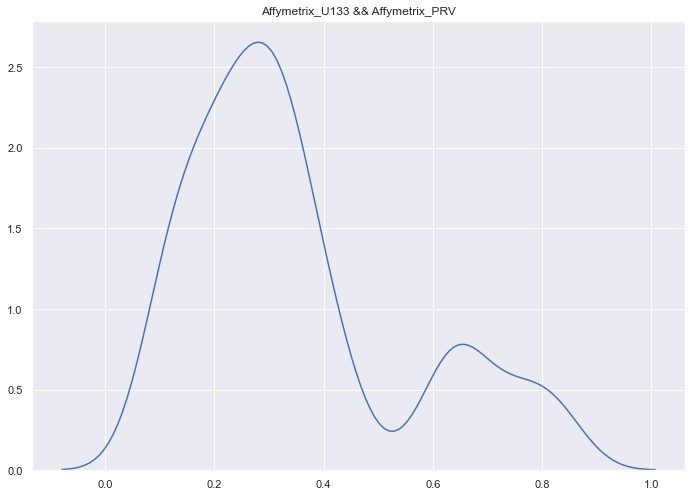

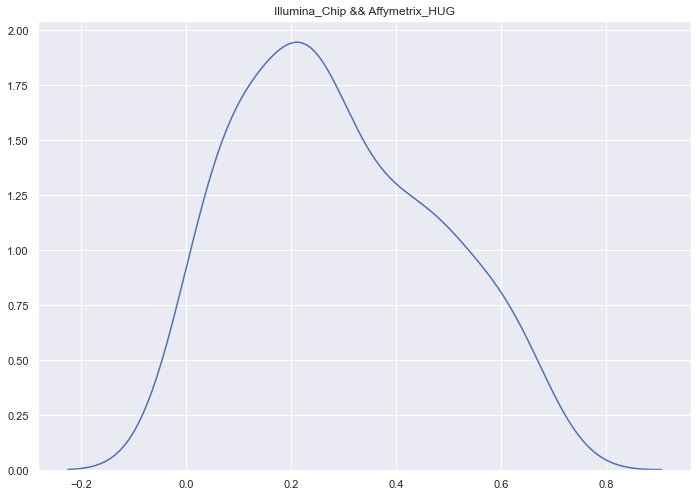

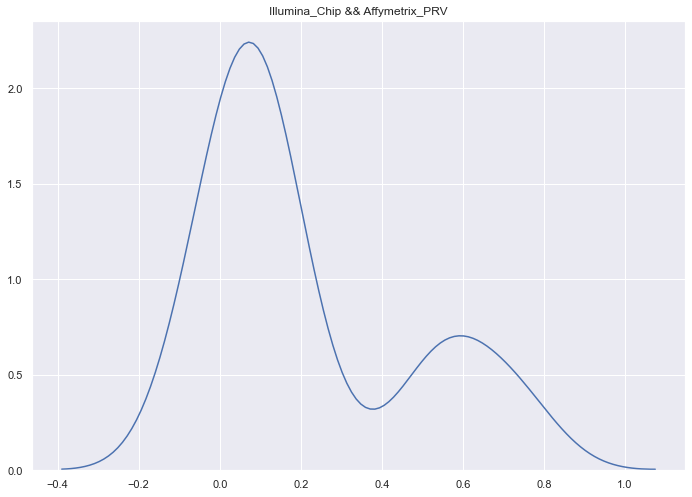

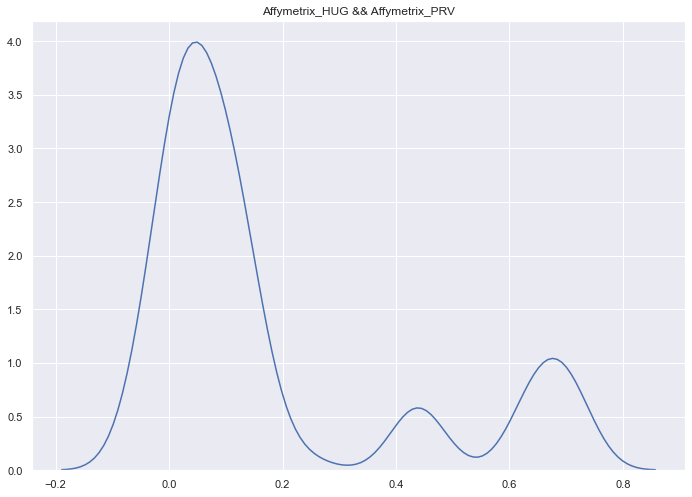

In [17]:
for idx_1, title_1 in enumerate(meta['plat'].unique()):
    for idx_2, title_2 in enumerate(meta['plat'].unique()):
        
        if(idx_2 > idx_1):
            
            plat_1 = meta[meta['plat'] == title_1]['CN']
            plat_2 = meta[meta['plat'] ==  title_2]['CN']
            
            corrs = [calc_corr(data, plat_1, plat_2) for i in range(100)]
            
            plt.figure()
            plt.title(title_1 + " && " + title_2)
            sns.distplot(corrs, hist=False)